In [1]:
from wells4hydro import mapping

In [2]:
#wms_test = mapping.readWMS("https://data.isgs.illinois.edu/arcgis/services/Elevation/IL_Statewide_Lidar_DEM_SPW/ImageServer/WMSServer?request=GetCapabilities&service=WMS")
wms_test = mapping.readWMS("https://data.isgs.illinois.edu/arcgis/services/Elevation/IL_Statewide_Lidar_DEM_WGS/ImageServer/WMSServer")
#wms_test = mapping.readWMS("https://data.isgs.illinois.edu/arcgis/services/Elevation/IL_Champaign_DSM_2008/ImageServer/WMSServer", size_x=500, size_y=500)

OrderedDict([('0', <owslib.map.wms111.ContentMetadata object at 0x000001ADEB9A9F60>)])


KeyError: 'No content named IL_Statewide_Lidar_DEM_WGS:None'

In [8]:
list(wms_test.contents)
wms_test['0'].title

'IL_Statewide_Lidar_DEM_WGS'

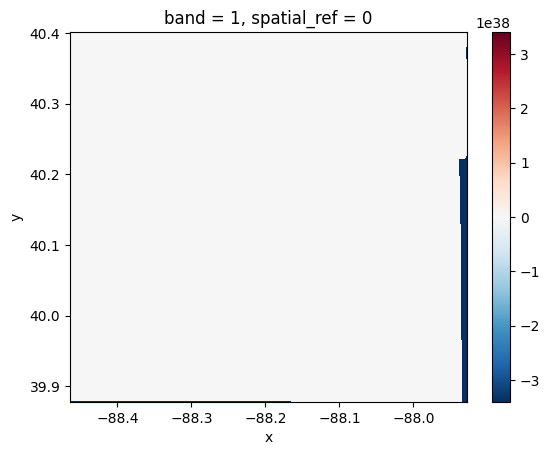

In [4]:
import rioxarray
import rasterio
import matplotlib.pyplot as plt

da = rioxarray.open_rasterio('champaign.png')
da.plot()

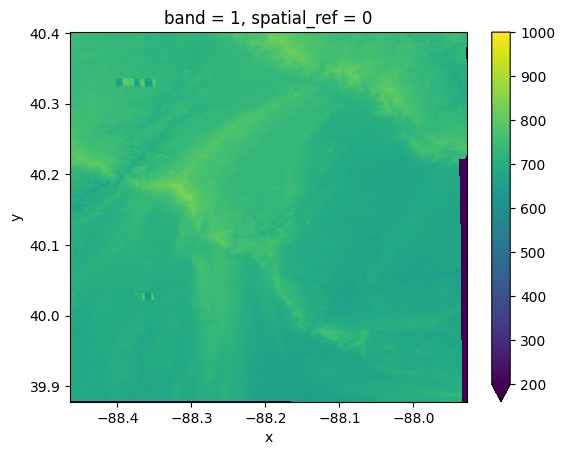

In [5]:
da.plot(vmin=200, vmax=1000)

In [8]:
da.sel(x=-88.2, y=40.2, method='nearest').data

array(726.0526, dtype=float32)

In [56]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import rioxarray
from rasterio.enums import Resampling
from rasterio import MemoryFile

#url ='https://services.terrascope.be/wms/v2?service=WMS&version=1.3.0&request=GetMap&layers=CGS_S2_RADIOMETRY&format=image/png&time=2020-06-01&width=1920&height=592&bbox=556945.9710290054,6657998.9149440415,575290.8578174476,6663655.255037144&styles=&srs=EPSG:3857'
#url = 'https://data.isgs.illinois.edu/arcgis/services/Elevation/IL_Statewide_Lidar_DEM_WGS/ImageServer/WMSServer?request=GetCapabilities&service=WMS&layers=0&format=image/png&width=256&height=256&bbox=39.878355,-88.463919,40.401138,-87.927627&srs=EPSG:4326'
#url = 'https://data.isgs.illinois.edu/arcgis/services/Elevation/IL_Statewide_Lidar_DEM_WGS/ImageServer/WMSServer?request=GetMap&service=WMS&layers=0&format=image/png&width=256&height=256&bbox=40.378355,-87.963919,40.401138,-87.927627&srs=EPSG:4326'
url = 'https://data.isgs.illinois.edu/arcgis/services/Elevation/IL_Statewide_Lidar_DEM_WGS/ImageServer/WMSServer?request=GetMap&service=WMS&layers=0&version=1.1.1&format=image/png&width=256&height=256&bbox=-9800000,4700000,-9799900,4700100&srs=EPSG:3857'
#url = 'https%3%2%2data.isgs.illinois.edu%2arcgis%2services%2Elevation%2IL_Statewide_Lidar_DEM_WGS%2ImageServer%2WMSServer?request=GetMap&service=WMS&layers=0&version=1.1.0&format=image%2png&size=256,256&bbox=-9800000,4700000,-9799900,4700100&srs=EPSG:3857'
#url = 'https://data.isgs.illinois.edu/arcgis/services/Elevation/IL_Champaign_DSM_2008/ImageServer/WMSServer?request=GetCapabilities&service=WMS&layers=0&format=image/png&width=256&height=256&bbox=39.878355,-88.463919,40.401138,-87.927627&srs=EPSG:4326'
raster = rasterio.open(url)
#raster = raster.read(out_shape=(raster.count, int(raster.height / 10000), int(raster.width / 10000)), resampling=Resampling.bilinear)
print(raster.meta)
show(raster)
#raster.plot()

{'driver': 'WMS', 'dtype': 'uint8', 'nodata': None, 'width': 1073741824, 'height': 1073741824, 'count': 3, 'crs': CRS.from_epsg(3857), 'transform': Affine(9.313225746154785e-08, 0.0, -9800000.0,
       0.0, -9.313225746154785e-08, 4700100.0)}


MemoryError: Unable to allocate 3.00 EiB for an array with shape (3, 1073741824, 1073741824) and data type uint8

In [32]:
from rasterio import MemoryFile
from rasterio.plot import show
from urllib.request import urlopen

url = 'https://data.isgs.illinois.edu/arcgis/services/Elevation/IL_Statewide_Lidar_DEM_SPW/ImageServer/WMSServer?request=GetCapabilities&service=WMS&layers=0&format=image/png&width=256&height=256&bbox=39.878355,-88.463919,40.401138,-87.927627&srs=EPSG:4326'

tif_bytes = urlopen(url).read()

with MemoryFile(tif_bytes) as memfile:
    with memfile.open() as dataset:
        print(dataset.profile)
        show(dataset)

{'driver': 'WMS', 'dtype': 'float_', 'nodata': None, 'width': 512, 'height': 512, 'count': 0, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False}


IndexError: band index 1 out of range (not in ())

In [43]:
from owslib.wms import WebMapService
from rasterio import MemoryFile
from rasterio.plot import show
import matplotlib.pyplot as plt
import rioxarray


wms_url = 'https://data.isgs.illinois.edu/arcgis/services/Elevation/IL_Statewide_Lidar_DEM_SPW/ImageServer/WMSServer?'

wms = WebMapService(wms_url)

request = wms.getmap(
    layers=['0'],
    srs='EPSG:4326',
    format='image/png',
    bbox=(36.964595,-91.577726,42.508988,-88.818393),
    size=(256,256)
)

with open('champaign_test1.png', 'wb') as f:
    f.write(request.read())
